# ****SANTANDER CUSTOMER SATISFACTION ANALYSIS****


****Team members:****

**MANILA DEVARAJ - 11699**

**KEERTHI JAYARAM - 11688**
      
**NEHAL SHARMA - 11675**

**GURUSHANKAR - 500**


****Problem Statement:****

****The Santander Group is a global banking group, led by Banco Santander S.A., the largest bank in the euro area. It has its origin in Santander, Cantabria, Spain. As every bank, they have a retention program that should be applied to unsatisfied customers.****

****We are given two files :a test.csv and train.csv which contains around 370 features which are anonymized and 1 dependent feature that is TARGET. The "TARGET" column is the variable to predict. It equals 1 for unsatisfied customers and 0 for satisfied customers.****

****In this project we will be predicting the probability of each customer in the test set being unsatisfied.****

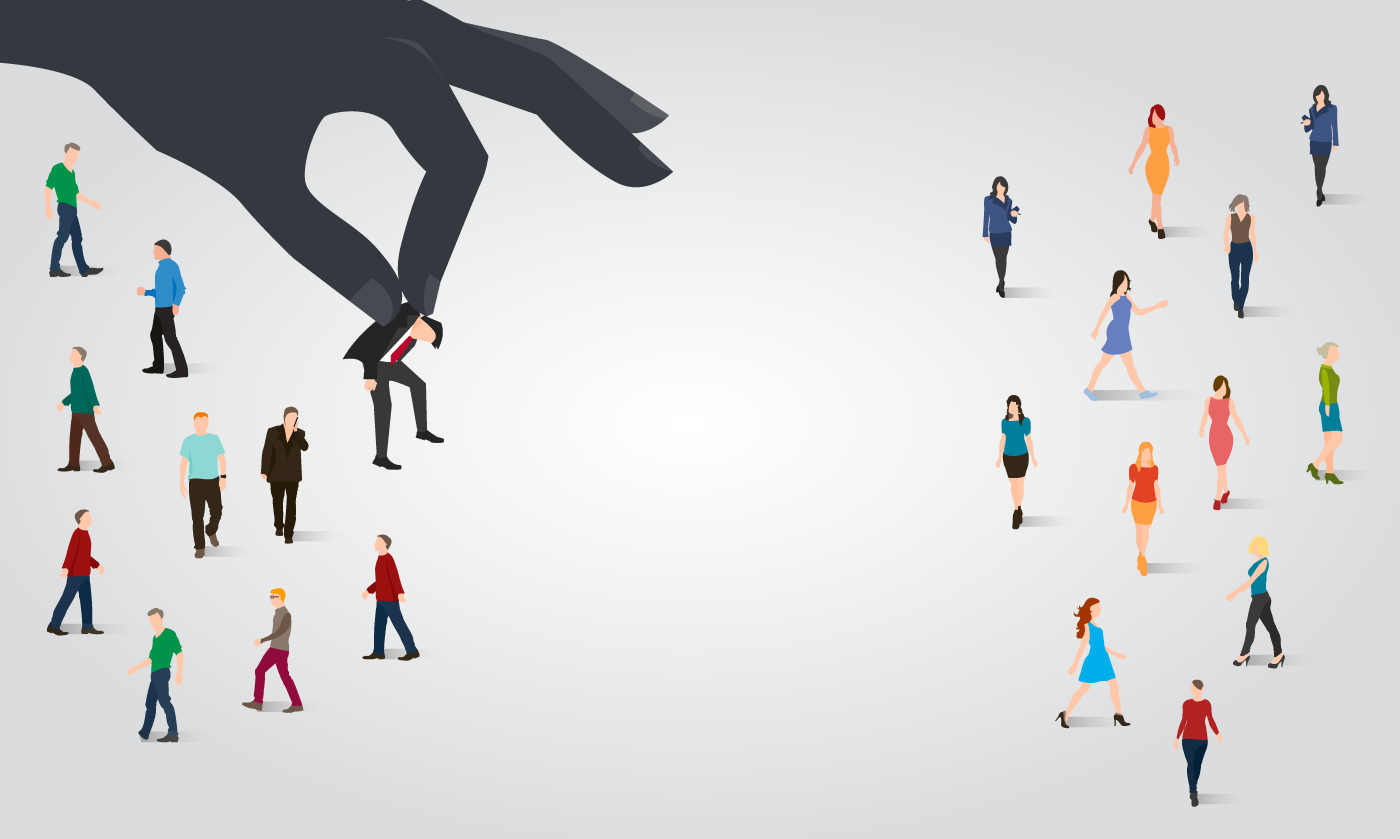

# ****Importing packages and Loading the data****

In [242]:
#Importing necessary packages
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import pandas as pd
from sklearn import linear_model
import pickle
import csv
from datetime import datetime
from sklearn import preprocessing

In [248]:
train_set = ("../input/customer/train.csv") #training set given
test_set = ("../input/customer/test.csv") #test set given

In [250]:
df = pd.read_csv(train_set)  #read given training data

In [284]:
df= train_df.drop('ID', axis = 1)
data=df

In [253]:
data.head(10) #this is our entire dataset now

,var3,var15,imp_ent_var16_ult1,imp_op_var39_comer_ult1,imp_op_var39_comer_ult3,imp_op_var40_comer_ult1,imp_op_var40_comer_ult3,imp_op_var40_efect_ult1,imp_op_var40_efect_ult3,imp_op_var40_ult1,...,saldo_medio_var33_hace2,saldo_medio_var33_hace3,saldo_medio_var33_ult1,saldo_medio_var33_ult3,saldo_medio_var44_hace2,saldo_medio_var44_hace3,saldo_medio_var44_ult1,saldo_medio_var44_ult3,var38,TARGET
0,2,23,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,39205.170000,0
1,2,34,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,49278.030000,0
2,2,23,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,67333.770000,0
3,2,37,0.0,195.0,195.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,64007.970000,0
4,2,39,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,117310.979016,0
5,2,23,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,87975.750000,0
6,2,27,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,94956.660000,0
7,2,26,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,251638.950000,0
8,2,45,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,101962.020000,0
9,2,25,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,356463.060000,0


In [254]:
data.isnull().values.any() #checking for null values

False

# ****Exploratory Data Analysis and Feature Engineering****

In [256]:
# Checking and removing Zero variance features
zvf=[]
count = 0;
for column in data.columns:
    if data[column].var() == 0:
        del data[column]
        count+=1
        zvf.append(column)
print(f'Total number of Zero Variance Columns deleted :{count}')
print(f'List of the deleted Zero Variance Columns :{zvf[0:]}')

Total number of Zero Variance Columns deleted :0
List of the deleted Zero Variance Columns :[]


In [257]:
#we check for features that were duplicated (ie they shared same values across datapoints)
import itertools
combinations = list(itertools.combinations(data.columns,2)) #getting all the combinations of columns
remove=[]
for f1,f2 in combinations: #finding all columns which have same datavalues, they don't share same feature name
    if (f1 not in remove) & (f2 not in remove):
        if data[f1].equals(data[f2]):
            remove.append(f1)
data.drop(remove,axis=1,inplace=True)

print(f'Number of duplicate columns removed :{len(remove)}')

Number of duplicate columns removed :29


In [258]:
#removing sparse features (features that have little information)
#if feature has 99 percentile value to be 0 then it is considered as a sparse feature.

#removing sparse features
count=0
for col in data.columns: #removing all sparse features
    if np.percentile(data[col],99)==0:
        count+=1
        del data[col]
print(f"No of sparse columns removed :{count}")

No of sparse columns removed :165


In [259]:
data.shape #We have 142 columns now, after filtering

(76020, 142)

In [260]:
data.describe()

,var3,var15,imp_ent_var16_ult1,imp_op_var39_comer_ult1,imp_op_var39_comer_ult3,imp_op_var41_comer_ult1,imp_op_var41_comer_ult3,imp_op_var41_efect_ult1,imp_op_var41_efect_ult3,imp_op_var41_ult1,...,saldo_medio_var12_hace2,saldo_medio_var12_hace3,saldo_medio_var12_ult1,saldo_medio_var12_ult3,saldo_medio_var13_corto_hace2,saldo_medio_var13_corto_hace3,saldo_medio_var13_corto_ult1,saldo_medio_var13_corto_ult3,var38,TARGET
count,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,...,7.602000e+04,76020.000000,7.602000e+04,7.602000e+04,76020.000000,76020.000000,76020.000000,76020.000000,7.602000e+04,76020.000000
mean,-1523.199277,33.212865,86.208265,72.363067,119.529632,68.803937,113.056934,68.205140,113.225058,137.242763,...,3.997023e+03,613.534443,5.703008e+03,4.401002e+03,3639.419939,556.184178,4852.261814,3857.848542,1.172358e+05,0.039569
std,39033.462364,12.956486,1614.757313,339.315831,546.266294,319.605516,512.154823,531.897917,950.086398,697.712596,...,3.777314e+04,9292.752726,4.620254e+04,3.550718e+04,26359.174223,7182.642532,31886.615189,25572.245055,1.826646e+05,0.194945
min,-999999.000000,5.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000e+00,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,5.163750e+03,0.000000
25%,2.000000,23.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000e+00,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,6.787061e+04,0.000000
50%,2.000000,28.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000e+00,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,1.064092e+05,0.000000
75%,2.000000,40.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000e+00,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,1.187563e+05,0.000000
max,238.000000,105.000000,210000.000000,12888.030000,21024.810000,12888.030000,16566.810000,45990.000000,131100.000000,47598.090000,...,3.000538e+06,668335.320000,3.004186e+06,2.272859e+06,450000.000000,304838.700000,450000.000000,450000.000000,2.203474e+07,1.000000


****It looks like most of the features are numerical, let's have a look at all the column names to see if they follow any naming convention:****

In [261]:
data.columns.values

array(['var3', 'var15', 'imp_ent_var16_ult1', 'imp_op_var39_comer_ult1',
       'imp_op_var39_comer_ult3', 'imp_op_var41_comer_ult1',
       'imp_op_var41_comer_ult3', 'imp_op_var41_efect_ult1',
       'imp_op_var41_efect_ult3', 'imp_op_var41_ult1',
       'imp_op_var39_efect_ult1', 'imp_op_var39_efect_ult3',
       'imp_op_var39_ult1', 'ind_var1_0', 'ind_var5_0', 'ind_var5',
       'ind_var8_0', 'ind_var8', 'ind_var12_0', 'ind_var12',
       'ind_var13_0', 'ind_var13_corto_0', 'ind_var13_corto',
       'ind_var13_largo_0', 'ind_var13', 'ind_var14_0', 'ind_var24_0',
       'ind_var24', 'ind_var25_cte', 'ind_var26_cte', 'ind_var26',
       'ind_var25', 'ind_var30_0', 'ind_var30', 'ind_var37_cte',
       'ind_var37', 'ind_var39_0', 'ind_var40_0', 'ind_var41_0',
       'num_var1_0', 'num_var4', 'num_var5_0', 'num_var5', 'num_var8_0',
       'num_var8', 'num_var12_0', 'num_var12', 'num_var13_0',
       'num_var13_corto_0', 'num_var13_corto', 'num_var13_largo_0',
       'num_var13', 'num_va

****Upon inspection, we notice that there are several features which have specific keywords in them which are:****

****‘imp’, ‘ind’, ‘num’, ‘saldo’ . These keywords were found to be short-forms for some spanish words which were obtained from several literatures/educated deductions.****

****1. Features with prefixes imp_, num_, saldo_ probably correspond as:****

****> importe --> amount****

****> numerico --> numerical****

****> saldo --> balance****

****So, these hould be numerical.****

****2. Features starting with ind_ could be an index, so probably categorical. These could be either 0 or 1.****

****3. Features with prefixes deltaimp, deltanum could account for some secondary features probably calculated based on some primary features. These should be numerical,too.****

****Let's verify that we only have numerical data in our dataset, first:****

In [263]:
data.dtypes.value_counts()

int64      101
float64     41
dtype: int64

****As we deduced, we can see that all our features are numerical.****

****Other than the group of features above, these are the other features in our dataset:****

****var3,
var15,
var38,
TARGET****

In [264]:
#Checking the Calibration of the dataset
count = pd.DataFrame(y_train.value_counts())
count

,TARGET
0,51112
1,2102


In [265]:
def remove_corr_var(data,target_threshold = 10**-3,within_threshold=0.95):
  """
  Remove correlated features that have low correlation with target 
  and have high correlation with each other (keeping one)
  """
  #removing all low correlated variables with target
  initial_feature = data.shape[1]
  corr = data.corr().abs()
  corr_target = pd.DataFrame(corr['TARGET']).sort_values(by='TARGET')
  threshold=target_threshold
  feat_df =corr_target[(corr_target['TARGET'])<=threshold]
  print("There are %i features that have a correlation values less than %.3f with 'TARGET'. We will remove all of this."\
        %(feat_df.shape[0],threshold))
  print("Removing.........")
  for df in [data]:
    df.drop(feat_df.index,axis=1,inplace=True)


  #removing highly correlated features(keeping one)
  
  corr.drop('TARGET',axis=1,inplace=True)
  corr.drop('TARGET',axis=0,inplace=True)
  corr.drop(feat_df.index,axis=1,inplace=True)
  corr.drop(feat_df.index,inplace=True)
  threshold = within_threshold
  upper = corr.where(np.triu(np.ones(corr.shape),k=1).astype(np.bool)) #getting upper traingle of correlation matrix
  column = [col for col in upper.columns if any(upper[col]>threshold)] #getting all columns that have high correlation with one of the features
  print("There are %i features that have high correlation with another feature with threshold being kept as %.3f and above. We will remove all of this."\
        %(len(column),threshold))
  print("Removing.........")
  for df in [data]:
    df.drop(column,axis=1,inplace=True)
  print("The features were changed from %i to %i. %i features were removed."%(initial_feature,data.shape[1],initial_feature-data.shape[1]))


In [266]:
remove_corr_var(data)

There are 3 features that have a correlation values less than 0.001 with 'TARGET'. We will remove all of this.
Removing.........
There are 46 features that have high correlation with another feature with threshold being kept as 0.950 and above. We will remove all of this.
Removing.........
The features were changed from 142 to 93. 49 features were removed.


In [267]:
X = data.iloc[:,:-1]
y = data.TARGET

****Train-Test Split:****

In [268]:
#train test split with a train size of 70% 
#with a random state of 17
random_state = 17
X_train , X_test , y_train , y_test = train_test_split(X, y , train_size = 0.7 , random_state = random_state)
print(f"Shape of the training Data:{X_train.shape}")

print(f"Shape of the testing Data:{X_test.shape}")

Shape of the training Data:(53214, 92)
Shape of the testing Data:(22806, 92)


In [269]:
X_train.head(2)

,var3,var15,imp_op_var39_comer_ult1,imp_op_var39_comer_ult3,imp_op_var41_efect_ult1,imp_op_var41_efect_ult3,imp_op_var41_ult1,ind_var1_0,ind_var5_0,ind_var5,...,saldo_medio_var5_ult1,saldo_medio_var5_ult3,saldo_medio_var8_hace2,saldo_medio_var8_ult1,saldo_medio_var8_ult3,saldo_medio_var12_hace2,saldo_medio_var12_hace3,saldo_medio_var13_corto_hace2,saldo_medio_var13_corto_hace3,var38
38095,2,26,0.0,0.0,0.0,0.0,0.0,0,1,1,...,3.0,2.70,0.0,0.0,0.0,0.0,0.0,0.0,0.0,48653.310000
45853,2,23,0.0,0.0,0.0,0.0,0.0,0,1,1,...,90.0,71.61,0.0,0.0,0.0,0.0,0.0,0.0,0.0,117310.979016


In [270]:
X_test.head(2)

,var3,var15,imp_op_var39_comer_ult1,imp_op_var39_comer_ult3,imp_op_var41_efect_ult1,imp_op_var41_efect_ult3,imp_op_var41_ult1,ind_var1_0,ind_var5_0,ind_var5,...,saldo_medio_var5_ult1,saldo_medio_var5_ult3,saldo_medio_var8_hace2,saldo_medio_var8_ult1,saldo_medio_var8_ult3,saldo_medio_var12_hace2,saldo_medio_var12_hace3,saldo_medio_var13_corto_hace2,saldo_medio_var13_corto_hace3,var38
72608,2,24,0.0,0.0,0.0,0.0,0.0,0,1,1,...,3.0,2.40,0.0,0.0,0.0,0.0,0.0,0.0,0.0,53471.58
29169,2,69,0.0,0.0,0.0,0.0,0.0,0,1,1,...,150.0,130.02,0.0,0.0,0.0,0.0,0.0,0.0,0.0,66008.91


****IMBALANCED DATA BEFORE INCORPORATING SMOTE:****

Text(0.5, 1.0, 'Target distribution')

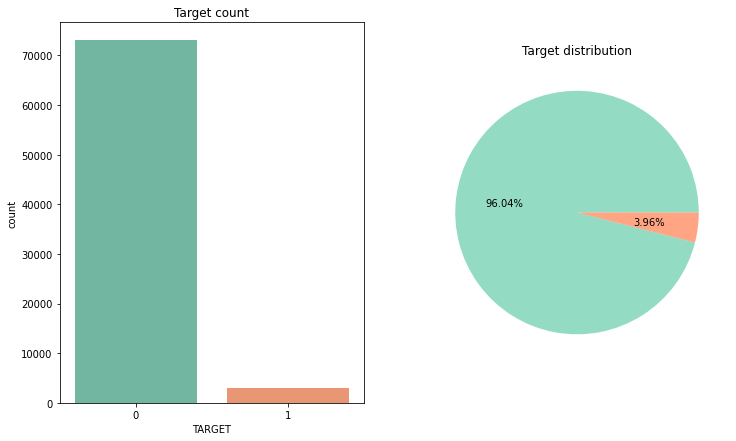

In [271]:
len_train = len(data)
target_0 = len(data.loc[data['TARGET']==0])/len_train
target_1 = 1-target_0

fig, axes = plt.subplots(1, 2, figsize=(12,7))

# TARGET distribution count
sns.countplot(x='TARGET', ax=axes[0], data=data, palette='Set2')
axes[0].set_title('Target count')

# TARGET distribution pie chart
axes[1].pie([target_0, target_1], colors=['mediumaquamarine', 'coral'],autopct='%1.2f%%', wedgeprops={'alpha':.7})
axes[1].set_title('Target distribution')

In [272]:
count=y_train.value_counts()
print("No. of data points before upsampling=",y_train.shape[0])
print("Percentage of unhappy customers in train data before upsampling={}%".format(round(count[1]*100/(count[0]+count[1]),2)))
print("Percentage of happy customers in train data before upsampling={}%".format(round(count[0]*100/(count[0]+count[1]),2)))

No. of data points before upsampling= 53214
Percentage of unhappy customers in train data before upsampling=3.95%
Percentage of happy customers in train data before upsampling=96.05%


****OBSERVATIONS:****

****The target column is highly unbalanced:****

****1. Happy customers (0): 96.05 %****

****2. Unhappy customers (1): 3.95 %****

****Balancing the data using SMOTE:
Out of the many ways to deal with imbalanced data, we are going to use SMOTE or Synthetic Minority Oversampling Technique to up sample the minority class. SMOTE basically uses a nearest neighbors algorithm to generate new and synthetic data we can use for training our model.****

****BALANCED DATA AFTER INCORPORATING SMOTE:****

In [273]:
from imblearn.over_sampling import SMOTE
smt = SMOTE(random_state=random_state)
data_cols=X_train.columns
X_Strain, y_Strain = smt.fit_resample(X_train, y_train) #upsampling using SMOTE
#SMOTE returns a numpy array
X_Strain=pd.DataFrame(X_Strain,columns=list(data_cols)) #Convert to DataFrame
y_Strain=pd.DataFrame(y_Strain,columns=["TARGET"])
count=y_Strain["TARGET"].value_counts()
print("No. of data points after upsampling=",y_Strain.shape[0])
print("Percentage of unhappy customers in train data after upsampling={}%".format(round(count[1]*100/(count[0]+count[1]),2)))
print("Percentage of happy customers in train data after upsampling={}%".format(round(count[0]*100/(count[0]+count[1]),2)))

No. of data points after upsampling= 102224
Percentage of unhappy customers in train data after upsampling=50.0%
Percentage of happy customers in train data after upsampling=50.0%


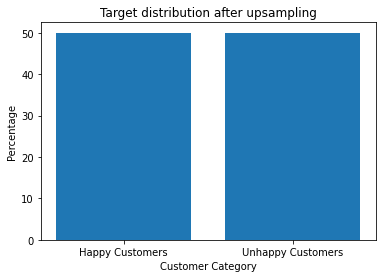

In [231]:
happy_percent=np.round(100*count[0]/(count[0]+count[1]),2)
unhappy_percent=np.round(100*count[1]/(count[0]+count[1]),2)
plt.bar([0,1],[happy_percent,unhappy_percent])
plt.xticks([0,1],['Happy Customers','Unhappy Customers'])
plt.xlabel("Customer Category")
plt.ylabel("Percentage")
plt.title("Target distribution after upsampling")
plt.show()

In [274]:
X_train.shape,X_Strain.shape

((53214, 92), (102224, 92))

In [235]:
X_Stest.shape,y_test.shape

((22806, 93), (22806,))

In [236]:
X_Strain.shape,y_Strain.shape

((102224, 92), (102224, 1))

In [ ]:
name1=X_Strain.columns
name2=X_Stest.columns

In [237]:
X_Strain=pd.DataFrame(data=X_Strain,columns=name1)
X_Strain.head(2)

,var3,var15,imp_op_var39_comer_ult1,imp_op_var39_comer_ult3,imp_op_var41_efect_ult1,imp_op_var41_efect_ult3,imp_op_var41_ult1,ind_var1_0,ind_var5_0,ind_var5,...,saldo_medio_var5_ult1,saldo_medio_var5_ult3,saldo_medio_var8_hace2,saldo_medio_var8_ult1,saldo_medio_var8_ult3,saldo_medio_var12_hace2,saldo_medio_var12_hace3,saldo_medio_var13_corto_hace2,saldo_medio_var13_corto_hace3,var38
0,2,26,0.0,0.0,0.0,0.0,0.0,0,1,1,...,3.0,2.70,0.0,0.0,0.0,0.0,0.0,0.0,0.0,48653.310000
1,2,23,0.0,0.0,0.0,0.0,0.0,0,1,1,...,90.0,71.61,0.0,0.0,0.0,0.0,0.0,0.0,0.0,117310.979016


In [238]:
X_Stest=pd.DataFrame(data=X_test,columns=name2)
X_Stest.head(2)

,var3,var15,imp_op_var39_comer_ult1,imp_op_var39_comer_ult3,imp_op_var41_efect_ult1,imp_op_var41_efect_ult3,imp_op_var41_ult1,ind_var1_0,ind_var5_0,ind_var5,...,saldo_medio_var5_ult1,saldo_medio_var5_ult3,saldo_medio_var8_hace2,saldo_medio_var8_ult1,saldo_medio_var8_ult3,saldo_medio_var12_hace2,saldo_medio_var12_hace3,saldo_medio_var13_corto_hace2,saldo_medio_var13_corto_hace3,var38
72608,2,24,0.0,0.0,0.0,0.0,0.0,0,1,1,...,3.0,2.40,0.0,0.0,0.0,0.0,0.0,0.0,0.0,53471.58
29169,2,69,0.0,0.0,0.0,0.0,0.0,0,1,1,...,150.0,130.02,0.0,0.0,0.0,0.0,0.0,0.0,0.0,66008.91


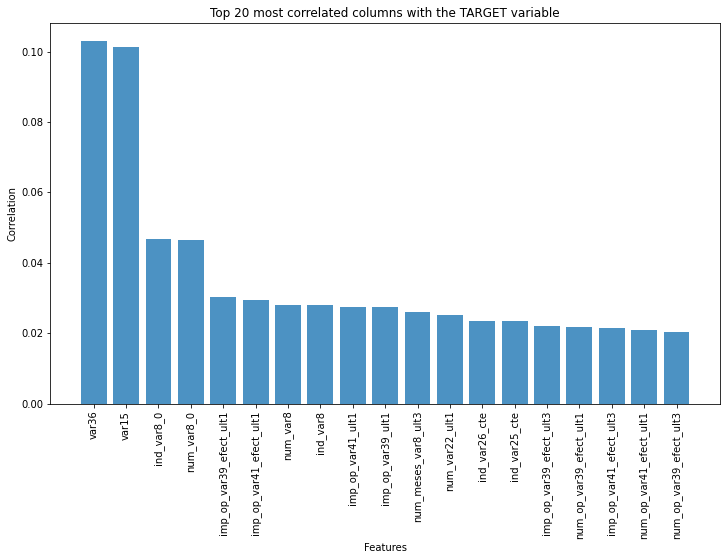

In [302]:
# Correlation of relevant features
corr = data.corr()
top20_corr = corr.nlargest(20, 'TARGET')['TARGET']

# Plot top20 correlations
fig, ax = plt.subplots(1, 1, sharex=False, sharey=False, figsize=(12,7))
plt.bar(top20_corr[1:].index.values, top20_corr[1:].values, alpha=0.8)
plt.title("Top 20 most correlated columns with the TARGET variable")
plt.ylabel("Correlation")
plt.xlabel("Features")
plt.xticks(rotation=90)
plt.show()

****We assume what an anonymized feature conveys from literature reviews/discussion forums and also by observing distribution of the feature's values.****

# 1. 'VAR' Columns:

****Columns with a 'var' prefix to them are taken to be relevant features, since their unique name (var) suggests that they might be related to the customer's personal information.****

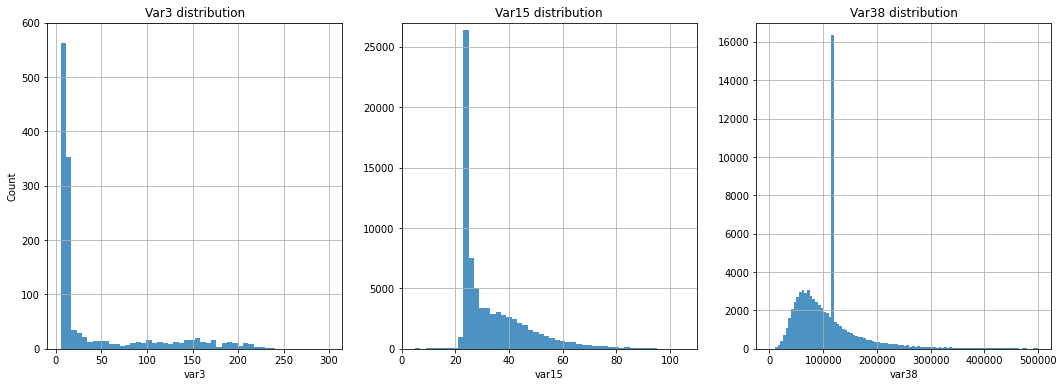

In [290]:
fig, ax = plt.subplots(1, 3, sharex=False, sharey=False, figsize=(18,6))

data.loc[data.var3.between(5, 500), 'var3'].hist(bins=50, range=(5, 300), ax=ax[0], alpha=0.8)
ax[0].set_title("Var3 distribution")
ax[0].set_ylabel("Count")
ax[0].set_xlabel("var3")
ax[0].set_ylim(0,600)

data.loc[data.var15.between(5, 100), 'var15'].hist(bins=50, range=(5, 105), ax=ax[1], alpha=0.8)
ax[1].set_title("Var15 distribution")
ax[1].set_xlabel("var15")
ax[1].set_ylim(0,27000)

data.var38.hist(bins=100, range=(0, 500000), ax=ax[2], alpha=0.8)
ax[2].set_title("Var38 distribution")
ax[2].set_xlabel("var38")
ax[2].set_ylim(0,17000)
plt.show()

# ****Let's explore the 3 'var' columns individually-****

In [291]:
data.var3.value_counts()

 2         74165
 8           138
-999999      116
 9           110
 3           108
           ...  
 218           1
 215           1
 151           1
 87            1
 191           1
Name: var3, Length: 208, dtype: int64

# ****1.1 var3: Place/Region of Origin****


****Based on some Literature reviews/discussions and also looking at the number of unique values present (=208) this feature i.e.,'var3' may be holding the information of the region where the customer is from. Let's explore this feature:****

In [292]:
print("Unique values in var3")
print(np.sort(data['var3'].unique()))

Unique values in var3
[-999999       0       1       2       3       4       5       6       7
       8       9      10      11      12      13      14      15      16
      17      18      19      20      21      22      23      24      25
      26      27      28      29      30      31      32      33      34
      35      36      38      40      41      42      43      44      45
      46      47      48      49      50      51      52      53      54
      55      56      57      58      59      60      61      62      63
      64      65      66      68      69      71      72      73      74
      76      77      78      79      81      82      84      85      86
      87      88      89      90      91      93      94      95      96
      97      98      99     100     101     102     103     104     105
     106     107     108     110     111     112     114     115     116
     117     118     119     120     121     122     124     125     126
     127     128     129     

****There is also an outlier in this feature which is '-999999' which may be a missing value. The values range from 0 to 208 except for the outlier. The most common unique value is found to be 2 from what our dataframe describe() function shows.****

In [293]:
# Replace -999999 in var3 column with most common value 2 
data = data.replace(-999999,2)
data.loc[data.var3==-999999].shape

(0, 370)

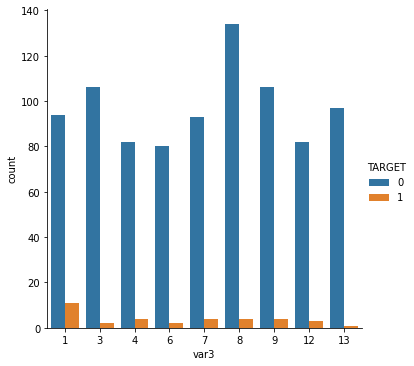

In [294]:
# filter by top countries, excluding the most common one (2)
top_countries = data[(data.var3 != -999999) & (data.var3 != 2)].groupby('var3').filter(lambda x: len(x) > 80)

# plot number of satisfied / unsatisfied customers by country
sns.catplot(x='var3', hue='TARGET', kind='count', data=top_countries)

# ****1.2 var15: Customer Age¶****

****It seems to us that the 'var15' feature corresponds to the customer age:****

In [295]:
data.var15.value_counts()

23     20170
24      6232
25      4217
26      3270
27      2861
       ...  
97         3
104        2
98         1
105        1
101        1
Name: var15, Length: 100, dtype: int64

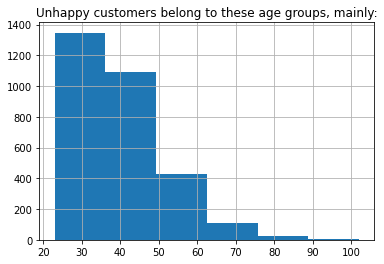

In [296]:
data[data.TARGET==1].var15.hist(bins=6)
plt.title('Unhappy customers belong to these age groups, mainly:');

****Looks like our young customers are more dissatisfied with their banking experience with Santander than the elderly population!****

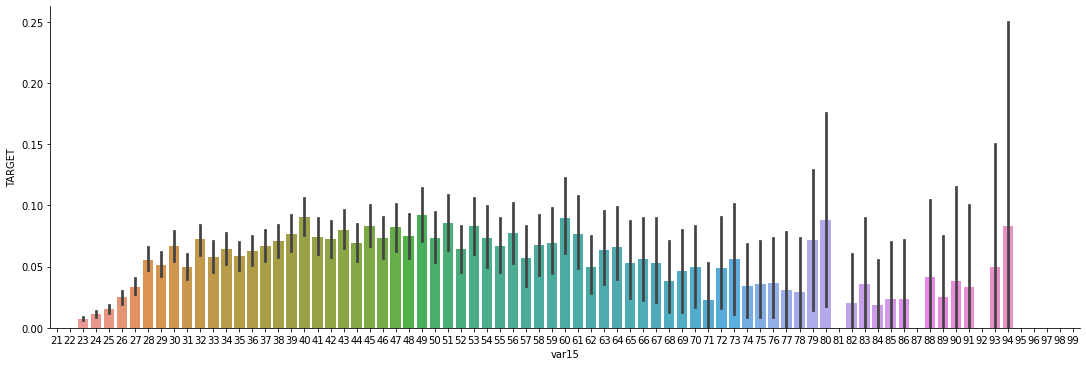

In [297]:
g = sns.catplot(x='var15', y='TARGET', kind='bar', data=data[(data.var15 > 20) & (data.var15 < 100)], aspect=3)
plt.show();

****From the plot we can see that customer dissatisfaction (value increasing towards 1) is mostly on a rise from ages 30 to 60 with a few crests here and there in the ages between the 2 values. Ages below 30 and above 70 don't seem to have the same problem with their banking experience apart from a couple of exceptions at ages 80 and 94.****

# ****1.3 var38: Mortgage****
****According to some users, the var38 corresponds to the Mortgage:****

In [298]:
# What are the most common values for var38 ?
data.var38.value_counts()

117310.979016    14868
451931.220000       16
463625.160000       12
288997.440000       11
104563.800000       11
                 ...  
323572.860000        1
126512.400000        1
237928.980000        1
76654.380000         1
87671.220000         1
Name: var38, Length: 57736, dtype: int64

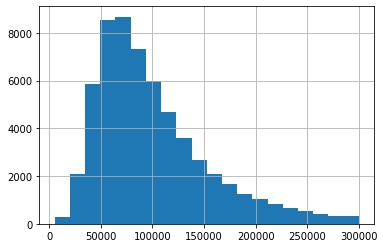

In [299]:
data[(data.var38 != 117310.979016494) & (data.var38 < 300000)].var38.hist(bins=20);

In [300]:
# what if we exclude the most common value
data.loc[~np.isclose(data.var38, 117310.979016), 'var38'].value_counts()

451931.22    16
463625.16    12
104563.80    11
288997.44    11
236690.34     8
             ..
73737.60      1
113585.04     1
159269.79     1
202066.26     1
87671.22      1
Name: var38, Length: 57734, dtype: int64

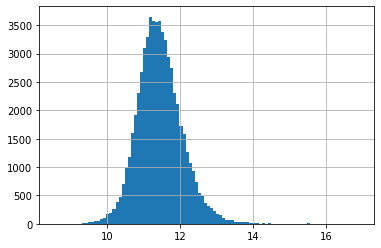

In [301]:
#Now,let's take a look at the distribution
data.loc[~np.isclose(data.var38, 117310.979016), 'var38'].map(np.log).hist(bins=100);

In [239]:
X_Strain["TARGET"]=y_Strain
train_df=X_Strain
X_Stest["TARGET"]=y_test
test_df=X_Stest

In [240]:
train="Train_data_pickle_final.pkl"
with open(train,'wb') as file:
    pickle.dump(train_df,file)

In [241]:
testi="Test_data_pickle_final.pkl"
with open(testi,'wb') as mfile:
    pickle.dump(test_df,mfile)

****For the next part (models) refer :****